## Synthetic signal : 

1)Filtering high frequency motion : bandwidth vs decorrelation timescale

2)Low frequency contamination

In [1]:
import xarray as xr
import numpy as np

from scipy import signal
import scipy.ndimage as im

import matplotlib.pyplot as plt

from sympy import Symbol, pi, atan, factor, lambdify

import sstats.hfreq as hf
import sstats.tseries as ts
import sstats.sigp as sigp
#import sstats.sigp_AP as sigp_AP
from sstats import get_cmap_colors
#import mitequinox.sigp as sp

rad = 2*np.pi

print_figs = True

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster
               )

In [6]:
ds = xr.open_dataset('/Users/zcaspar/codes/mit4320/synthetic_mean.nc').persist()

ds

<xarray.Dataset>
Dimensions:                       (time: 7200, rms: 3, T: 3, T_low: 3,
                                   bandwidth: 3)
Coordinates:
  * time                          (time) float64 0.0 0.04167 ... 299.9 300.0
  * rms                           (rms) float64 0.01 0.1 1.0
  * T                             (T) int64 5 30 80
  * T_low                         (T_low) int64 5 15 30
  * bandwidth                     (bandwidth) float64 0.2 0.4 0.6
Data variables: (12/43)
    low                           (T_low, time) float64 ...
    M2_coh_demodulated_real       (rms, time) float64 ...
    M2_coh_demodulated_imag       (rms, time) float64 ...
    M2_coh_demod_filt_real        (bandwidth, rms, time) float64 ...
    M2_coh_demod_filt_imag        (bandwidth, rms, time) float64 ...
    M2_mix_demodulated_real       (rms, T, time) float64 ...
    ...                            ...
    total_coh_demod_filt_real     (bandwidth, rms, T_low, time) float64 ...
    total_coh_demod_filt_imag     (bandwidth, rms, T_low, time) float64 ...
    total_mix_demod_filt_real     (bandwidth, rms, T, T_low, time) float64 ...
    total_mix_demod_filt_imag     (bandwidth, rms, T, T_low, time) float64 ...
    total_inc_demod_filt_real     (bandwidth, rms, T, T_low, time) float64 ...
    total_inc_demod_filt_imag     (bandwidth, rms, T, T_low, time) float64 ...

In [7]:
for c in ['M2','S2','high_MS']:
    for p in ['_coh','_mix','_inc']:
        ds[c+p+'_demodulated'] = ds[c+p+'_demodulated_real']+1j*ds[c+p+'_demodulated_imag']
        ds[c+p+'_demod_filt'] = ds[c+p+'_demod_filt_real']+1j*ds[c+p+'_demod_filt_imag']

In [8]:
for p in ['_coh','_mix','_inc']:
    ds['total'+p+'_demod_filt'] = ds['total'+p+'_demod_filt_real']+1j*ds['total'+p+'_demod_filt_imag']

In [9]:
ds = ds.persist()

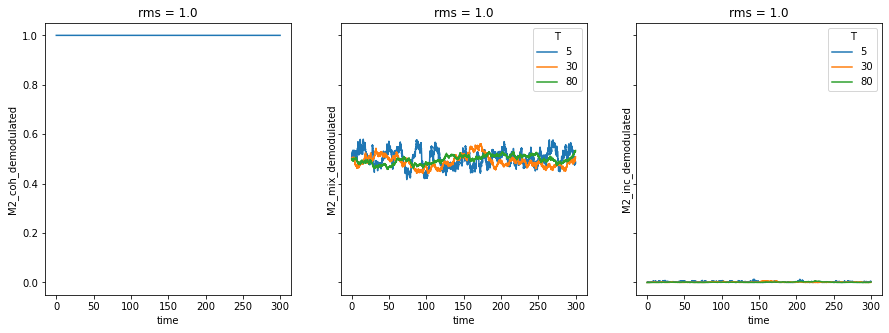

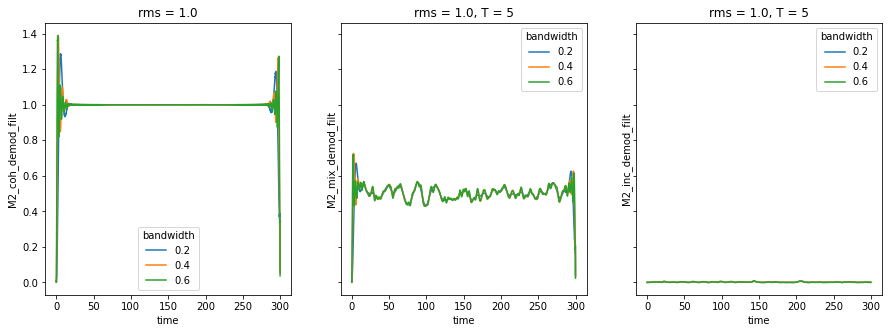

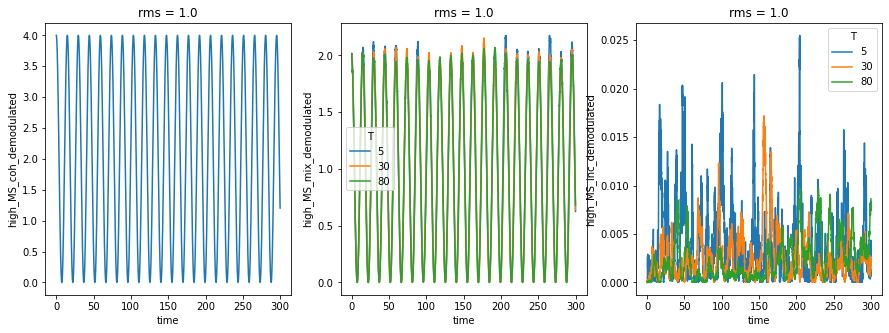

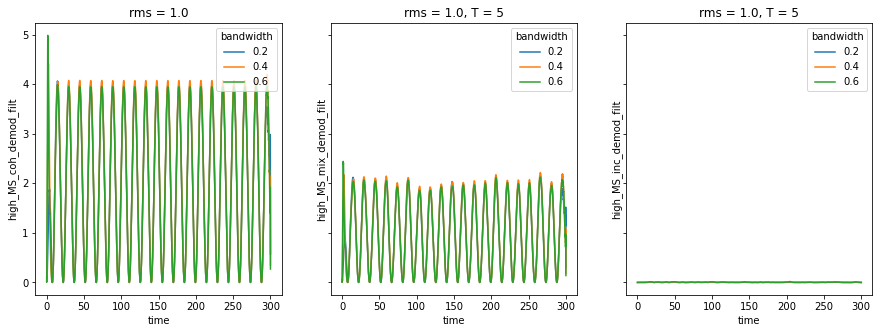

In [10]:
# Energy : 
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey = True)
np.abs(ds['M2_coh_demodulated'].sel(rms=1.)**2).plot(ax=axs[0])
np.abs(ds['M2_mix_demodulated'].sel(rms=1.)**2).plot(ax=axs[1],hue='T')
np.abs(ds['M2_inc_demodulated'].sel(rms=1.)**2).plot(ax=axs[2],hue='T')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey = True)
np.abs(ds['M2_coh_demod_filt'].sel(rms=1.)**2).plot(ax=axs[0],hue = 'bandwidth')
np.abs(ds['M2_mix_demod_filt'].sel(rms=1.,T=5)**2).plot(ax=axs[1],hue='bandwidth')
np.abs(ds['M2_inc_demod_filt'].sel(rms=1.,T=5)**2).plot(ax=axs[2],hue='bandwidth')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey = False)
np.abs(ds['high_MS_coh_demodulated'].sel(rms=1.)**2).plot(ax=axs[0])
np.abs(ds['high_MS_mix_demodulated'].sel(rms=1.)**2).plot(ax=axs[1],hue='T')
np.abs(ds['high_MS_inc_demodulated'].sel(rms=1.)**2).plot(ax=axs[2],hue='T')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey = True)
np.abs(ds['high_MS_coh_demod_filt'].sel(rms=1.)**2).plot(ax=axs[0],hue = 'bandwidth')
np.abs(ds['high_MS_mix_demod_filt'].sel(rms=1.,T=5)**2).plot(ax=axs[1],hue='bandwidth')
np.abs(ds['high_MS_inc_demod_filt'].sel(rms=1.,T=5)**2).plot(ax=axs[2],hue='bandwidth')

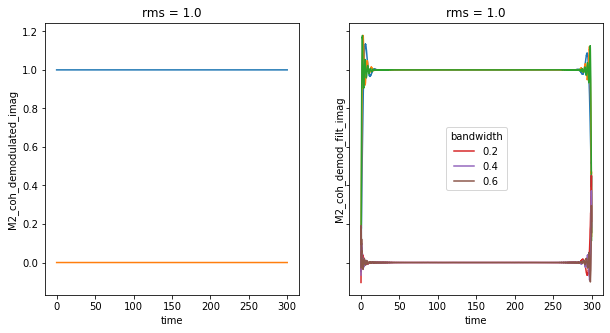

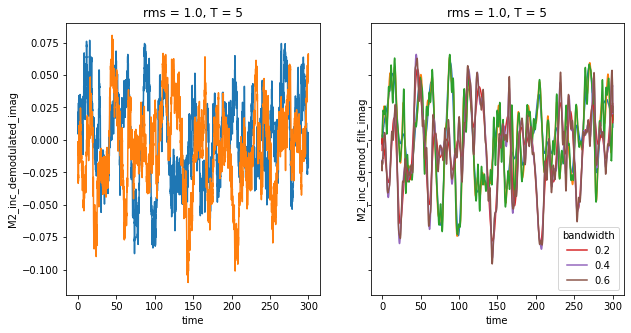

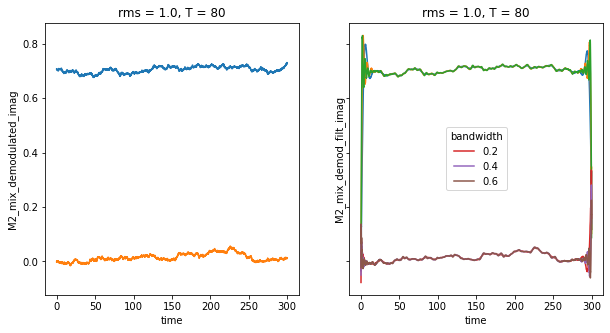

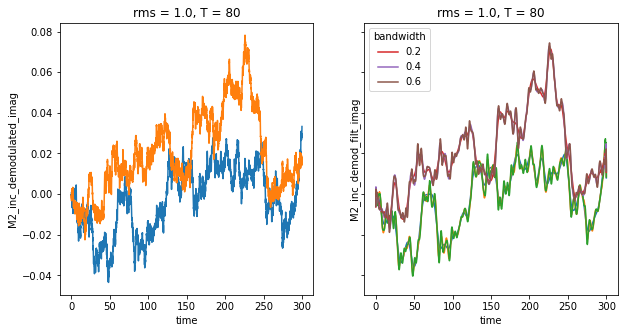

In [67]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['M2_coh_demodulated_real'].sel(rms=1.).plot(ax=axs[0])
ds['M2_coh_demodulated_imag'].sel(rms=1.).plot(ax=axs[0])
ds['M2_coh_demod_filt_real'].sel(rms=1.).plot(ax=axs[1],hue='bandwidth')
ds['M2_coh_demod_filt_imag'].sel(rms=1.).plot(ax=axs[1],hue='bandwidth')


fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['M2_inc_demodulated_real'].sel(rms=1.,T=5).plot(ax=axs[0])
ds['M2_inc_demodulated_imag'].sel(rms=1.,T=5).plot(ax=axs[0])
ds['M2_inc_demod_filt_real'].sel(rms=1.,T=5).plot(ax=axs[1],hue='bandwidth')
ds['M2_inc_demod_filt_imag'].sel(rms=1.,T=5).plot(ax=axs[1],hue='bandwidth')

fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['M2_mix_demodulated_real'].sel(rms=1.,T=80).plot(ax=axs[0])
ds['M2_mix_demodulated_imag'].sel(rms=1.,T=80).plot(ax=axs[0])
ds['M2_mix_demod_filt_real'].sel(rms=1.,T=80).plot(ax=axs[1],hue='bandwidth')
ds['M2_mix_demod_filt_imag'].sel(rms=1.,T=80).plot(ax=axs[1],hue='bandwidth')

fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['M2_inc_demodulated_real'].sel(rms=1.,T=80).plot(ax=axs[0])
ds['M2_inc_demodulated_imag'].sel(rms=1.,T=80).plot(ax=axs[0])
ds['M2_inc_demod_filt_real'].sel(rms=1.,T=80).plot(ax=axs[1],hue='bandwidth')
ds['M2_inc_demod_filt_imag'].sel(rms=1.,T=80).plot(ax=axs[1],hue='bandwidth')

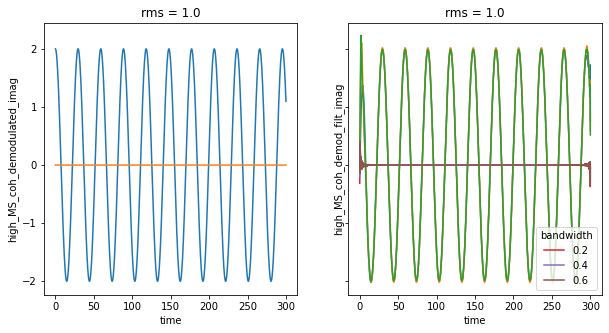

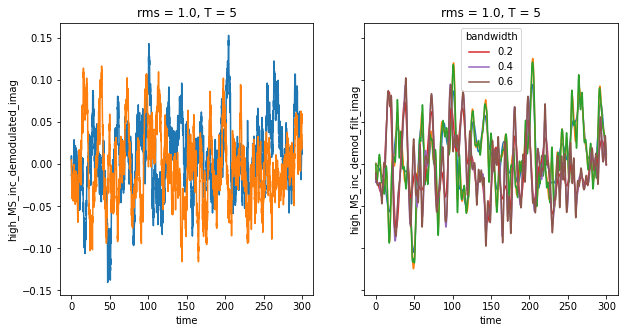

In [49]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['high_MS_coh_demodulated_real'].sel(rms=1.).plot(ax=axs[0])
ds['high_MS_coh_demodulated_imag'].sel(rms=1.).plot(ax=axs[0])
ds['high_MS_coh_demod_filt_real'].sel(rms=1.).plot(ax=axs[1],hue='bandwidth')
ds['high_MS_coh_demod_filt_imag'].sel(rms=1.).plot(ax=axs[1],hue='bandwidth')

fig,axs = plt.subplots(1,2,figsize=(10,5),sharey = True)
ds['high_MS_inc_demodulated_real'].sel(rms=1.,T=5).plot(ax=axs[0])
ds['high_MS_inc_demodulated_imag'].sel(rms=1.,T=5).plot(ax=axs[0])
ds['high_MS_inc_demod_filt_real'].sel(rms=1.,T=5).plot(ax=axs[1],hue='bandwidth')
ds['high_MS_inc_demod_filt_imag'].sel(rms=1.,T=5).plot(ax=axs[1],hue='bandwidth')

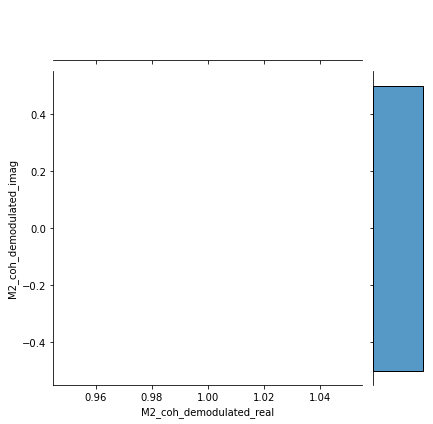

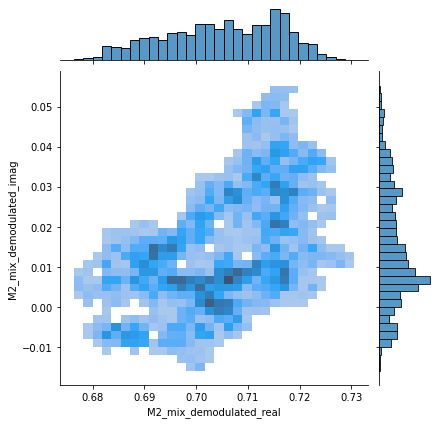

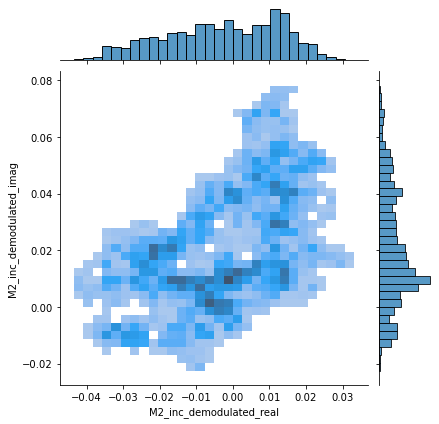

In [13]:
import seaborn as sns
sns.jointplot(x = ds['M2_coh_demodulated_real'].sel(rms=1.),
              y=ds['M2_coh_demodulated_imag'].sel(rms=1.),kind="hist")

sns.jointplot(x = ds['M2_mix_demodulated_real'].sel(T=80,rms=1.),
              y=ds['M2_mix_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

sns.jointplot(x = ds['M2_inc_demodulated_real'].sel(T=80,rms=1.),
              y=ds['M2_inc_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

#### Notes : 
Monochromatic signal : 


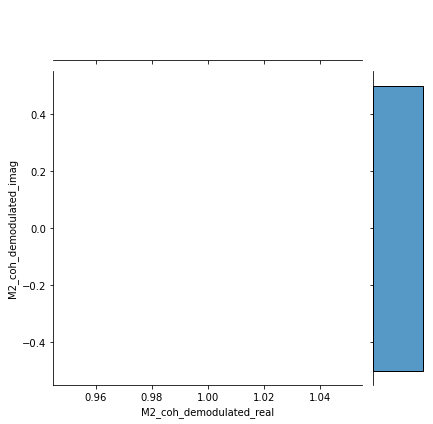

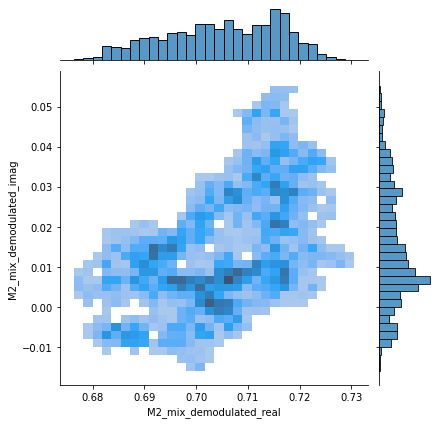

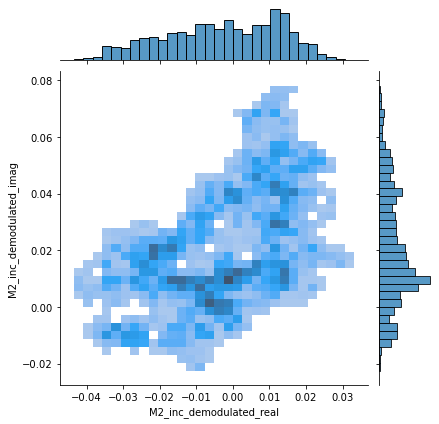

In [14]:
c = 'M2'
sns.jointplot(x = ds[c+'_coh_demodulated_real'].sel(rms=1.),
              y=ds[c+'_coh_demodulated_imag'].sel(rms=1.),kind="hist")

sns.jointplot(x = ds[c+'_mix_demodulated_real'].sel(T=80,rms=1.),
              y=ds[c+'_mix_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

sns.jointplot(x = ds[c+'_inc_demodulated_real'].sel(T=80,rms=1.),
              y=ds[c+'_inc_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

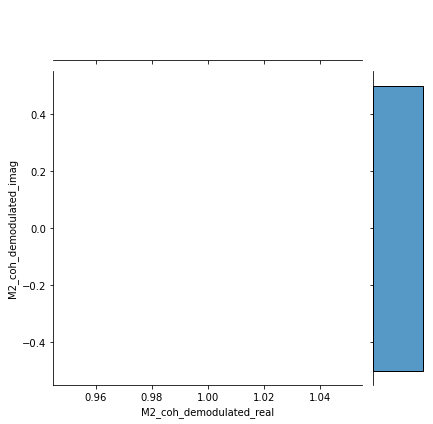

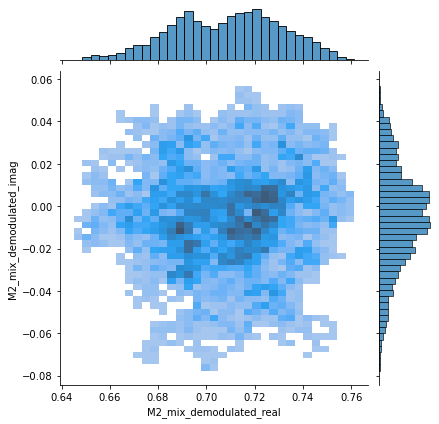

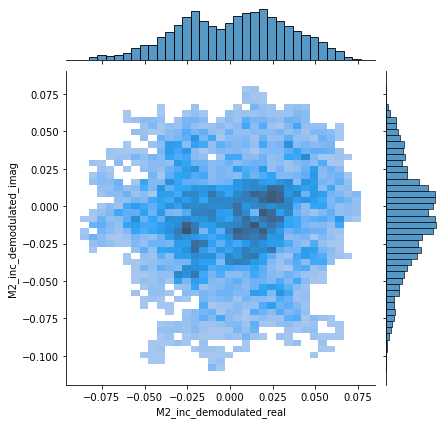

In [71]:
c = 'M2'
sns.jointplot(x = ds[c+'_coh_demodulated_real'].sel(rms=1.),
              y=ds[c+'_coh_demodulated_imag'].sel(rms=1.),kind="hist")

sns.jointplot(x = ds[c+'_mix_demodulated_real'].sel(T=5,rms=1.),
              y=ds[c+'_mix_demodulated_imag'].sel(rms=1.,T=5),kind="hist")

sns.jointplot(x = ds[c+'_inc_demodulated_real'].sel(T=5,rms=1.),
              y=ds[c+'_inc_demodulated_imag'].sel(rms=1.,T=5),kind="hist")

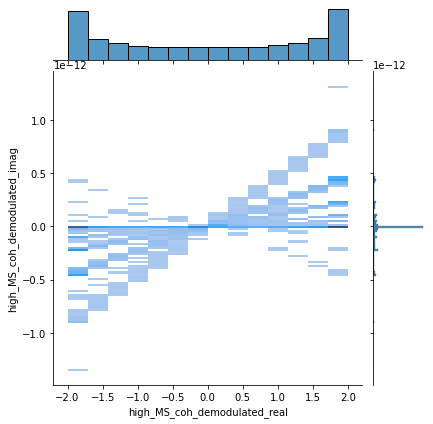

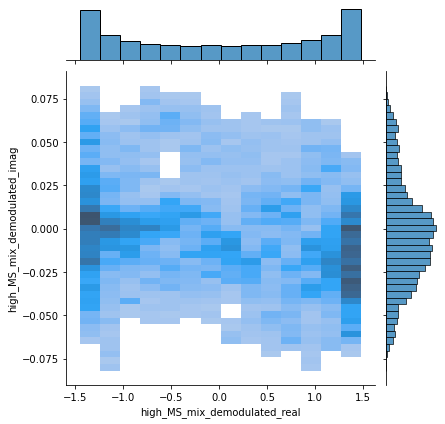

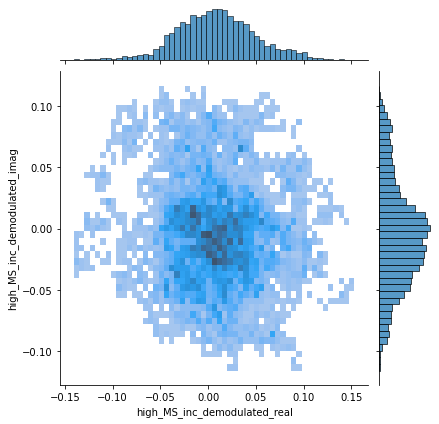

In [72]:
c = 'high_MS'
sns.jointplot(x = ds[c+'_coh_demodulated_real'].sel(rms=1.),
              y=ds[c+'_coh_demodulated_imag'].sel(rms=1.),kind="hist")

sns.jointplot(x = ds[c+'_mix_demodulated_real'].sel(T=5,rms=1.),
              y=ds[c+'_mix_demodulated_imag'].sel(rms=1.,T=5),kind="hist")

sns.jointplot(x = ds[c+'_inc_demodulated_real'].sel(T=5,rms=1.),
              y=ds[c+'_inc_demodulated_imag'].sel(rms=1.,T=5),kind="hist")

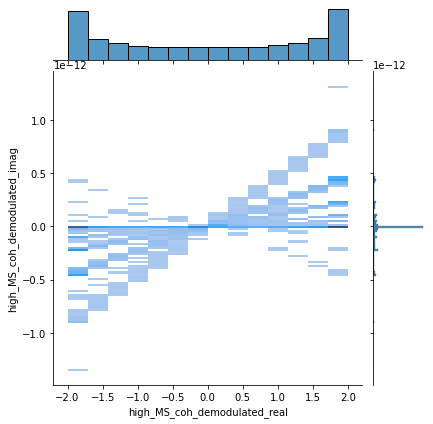

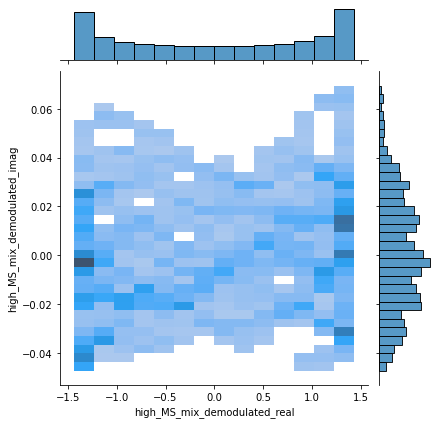

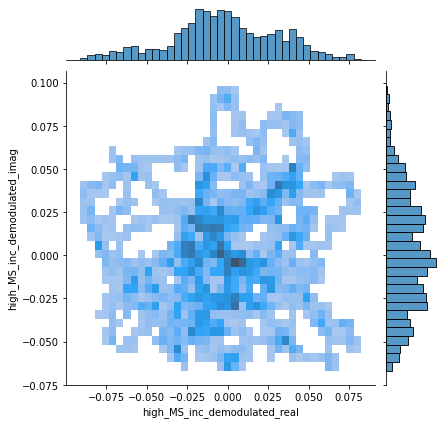

In [8]:
c = 'high_MS'
sns.jointplot(x = ds[c+'_coh_demodulated_real'].sel(rms=1.),
              y=ds[c+'_coh_demodulated_imag'].sel(rms=1.),kind="hist")

sns.jointplot(x = ds[c+'_mix_demodulated_real'].sel(T=80,rms=1.),
              y=ds[c+'_mix_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

sns.jointplot(x = ds[c+'_inc_demodulated_real'].sel(T=80,rms=1.),
              y=ds[c+'_inc_demodulated_imag'].sel(rms=1.,T=80),kind="hist")

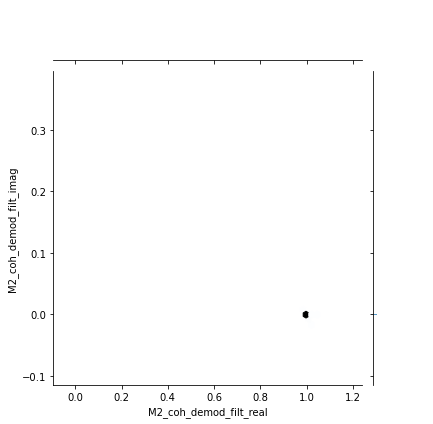

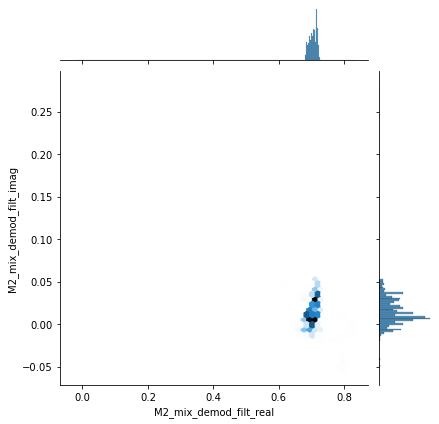

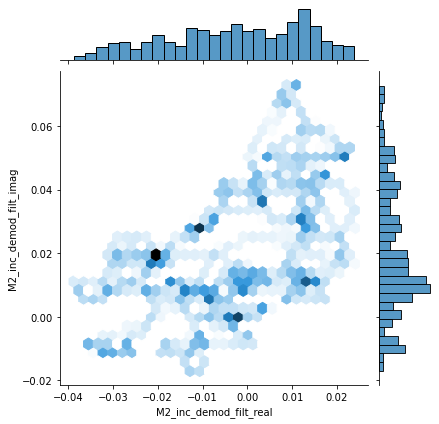

In [15]:
c,p = 'M2','_demod_filt'
sns.jointplot(x = ds[c+'_coh'+p+'_real'].sel(bandwidth=0.4,rms=1.),
              y=ds[c+'_coh'+p+'_imag'].sel(bandwidth=0.4,rms=1.),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="hex")

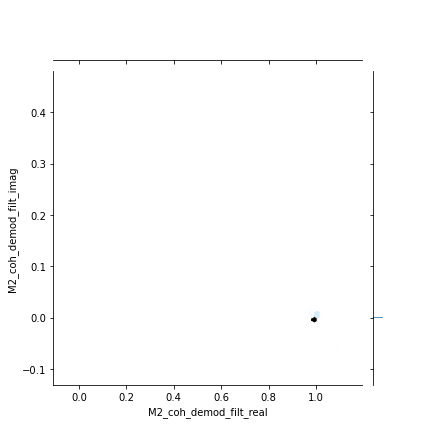

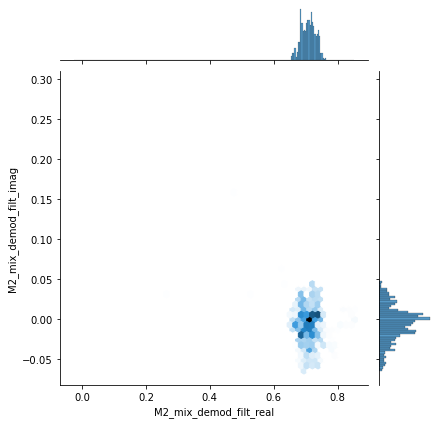

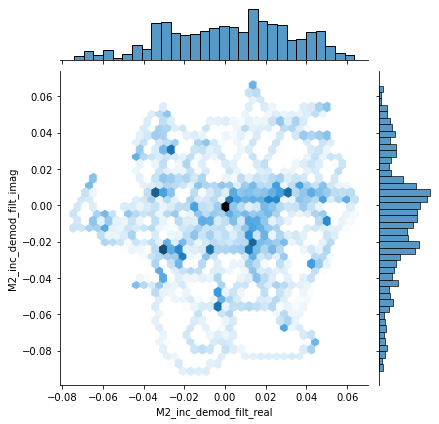

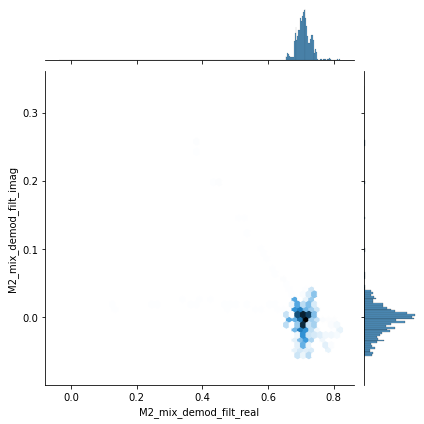

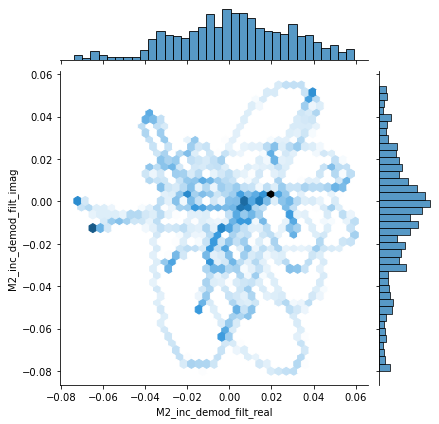

In [63]:
c,p = 'M2','_demod_filt'
sns.jointplot(x = ds[c+'_coh'+p+'_real'].sel(bandwidth=0.2,rms=1.),
              y=ds[c+'_coh'+p+'_imag'].sel(bandwidth=0.2,rms=1.),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.2,T=5,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.2,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.2,T=5,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.2,rms=1.,T=5),kind="hex")

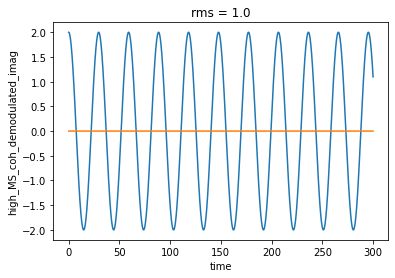

In [19]:
ds['high_MS_coh_demodulated_real'].sel(rms=1).plot()
ds['high_MS_coh_demodulated_imag'].sel(rms=1).plot()

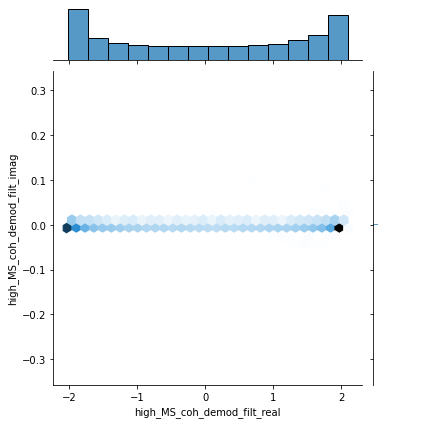

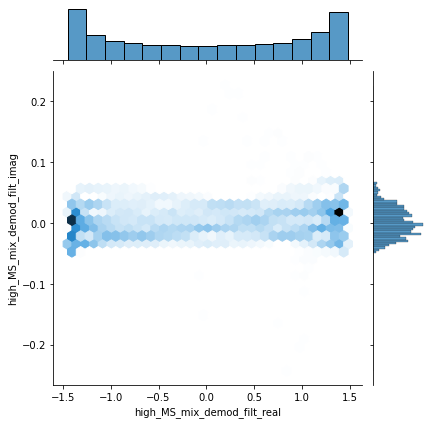

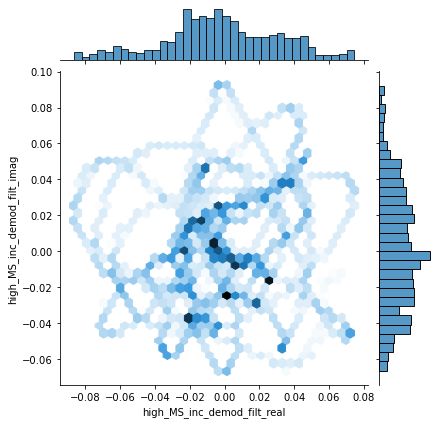

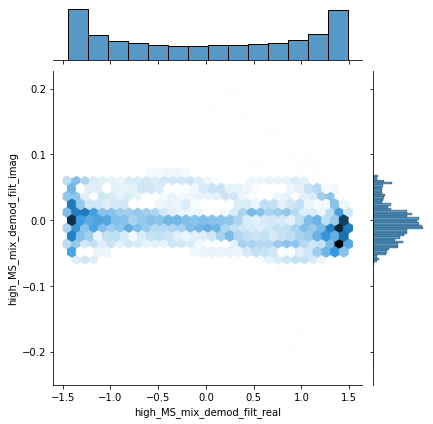

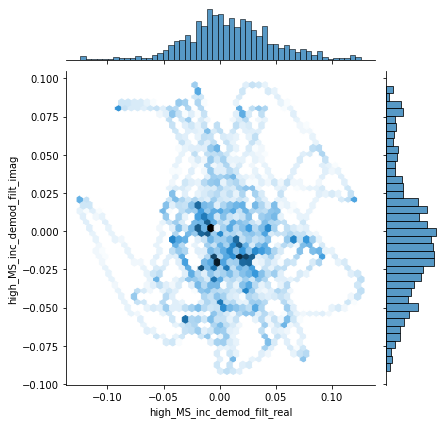

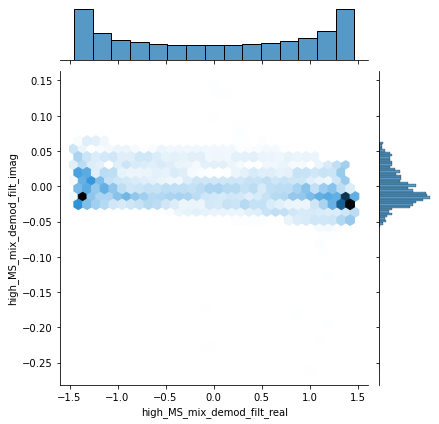

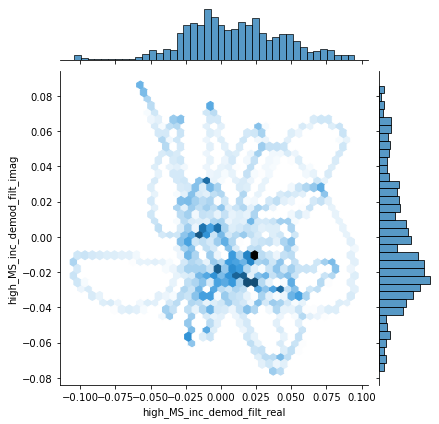

In [64]:
c,p = 'high_MS','_demod_filt'
sns.jointplot(x = ds[c+'_coh'+p+'_real'].sel(bandwidth=0.4,rms=1.),
              y=ds[c+'_coh'+p+'_imag'].sel(bandwidth=0.4,rms=1.),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.2,T=5,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.2,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.2,T=5,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.2,rms=1.,T=5),kind="hex")

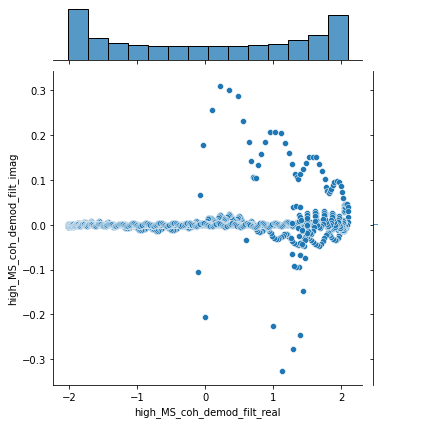

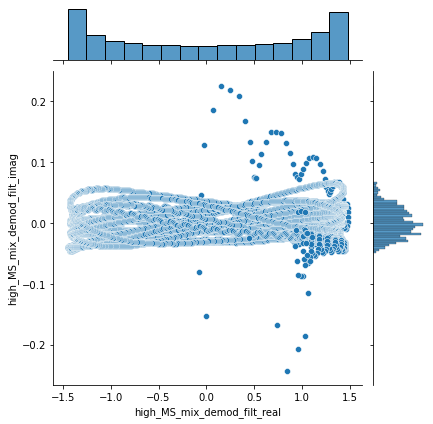

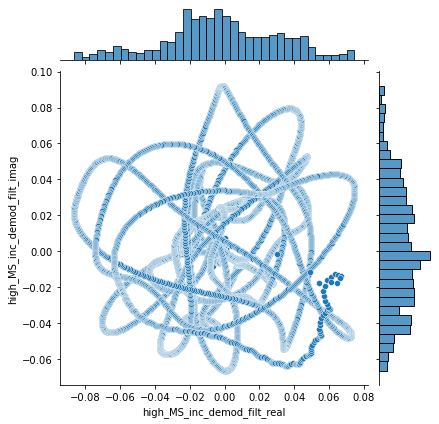

In [33]:
c,p = 'high_MS','_demod_filt'
sns.jointplot(x = ds[c+'_coh'+p+'_real'].sel(bandwidth=0.4,rms=1.),
              y=ds[c+'_coh'+p+'_imag'].sel(bandwidth=0.4,rms=1.),kind="scatter")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="scatter")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=80,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=80),kind="scatter")

In [36]:
ds.T

<xarray.DataArray 'T' (T: 3)>
array([ 5, 30, 80])
Coordinates:
  * T        (T) int64 5 30 80

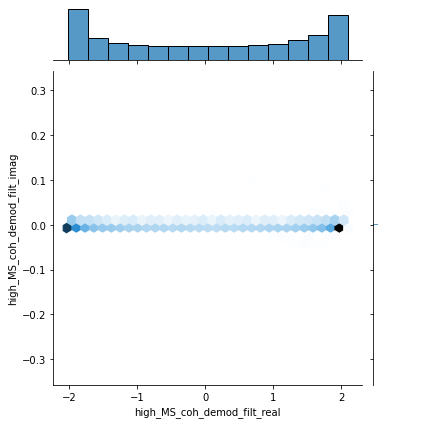

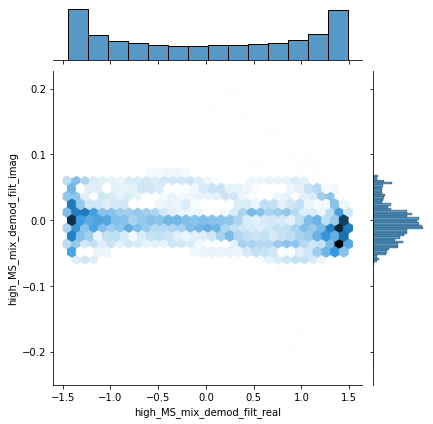

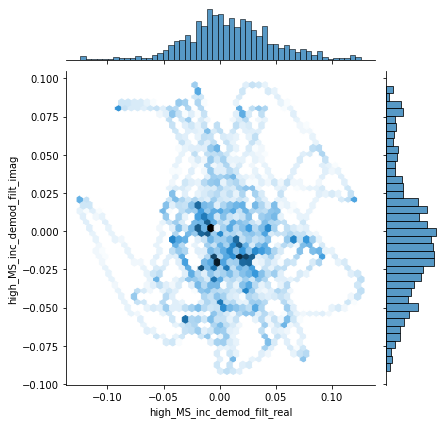

In [37]:
c,p = 'high_MS','_demod_filt'
sns.jointplot(x = ds[c+'_coh'+p+'_real'].sel(bandwidth=0.4,rms=1.),
              y=ds[c+'_coh'+p+'_imag'].sel(bandwidth=0.4,rms=1.),kind="hex")

sns.jointplot(x = ds[c+'_mix'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_mix'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

sns.jointplot(x = ds[c+'_inc'+p+'_real'].sel(bandwidth=0.4,T=5,rms=1.),
              y=ds[c+'_inc'+p+'_imag'].sel(bandwidth=0.4,rms=1.,T=5),kind="hex")

Motions parameters

In [3]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
